In [105]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.isotonic import IsotonicRegression
df = pd.read_csv('/Users/erenanbar/Desktop/internship_project/data/ticketData_vs_num_disconnections.csv')
df.describe()

,num_disconnection,ticket_size,total_size
count,19720.000000,19720.000000,19720.000000
mean,52.314604,1.226775,508.032860
std,60.749202,9.173458,5476.256528
min,1.000000,0.000000,1.000000
25%,16.000000,0.000000,1.000000
50%,36.000000,0.000000,3.000000
75%,65.000000,0.000000,12.000000
max,1061.000000,224.000000,106544.000000


In [106]:
bins = np.arange(start = 0,
                 stop = 51,
                 step = 5)
bins = np.append(bins,np.max(df['num_disconnection']))
bin_labels = range(1,len(bins))

In [107]:
df['bin'], bin_edges = pd.cut(df['num_disconnection'], 
                              bins=bins, 
                              labels = bin_labels, 
                              retbins = True)
bin_table = pd.DataFrame(zip(bin_edges, bin_labels),
                            columns=['bin_edge', 'bin_labels'])

In [108]:
df = df.groupby(['modelName','bin']).aggregate({'ticket_size':'sum','total_size':'sum'}).reset_index()
df['call_prob'] = df['ticket_size']/df['total_size']
df['call_prob'] = df['call_prob'].fillna(0)
df.groupby(['modelName']).get_group(('DLink DIR-853/ET'))
                                                                

,modelName,bin,ticket_size,total_size,call_prob
33,DLink DIR-853/ET,1,17790,8445021,0.002107
34,DLink DIR-853/ET,2,520,100920,0.005153
35,DLink DIR-853/ET,3,180,27211,0.006615
36,DLink DIR-853/ET,4,103,13398,0.007688
37,DLink DIR-853/ET,5,66,7629,0.008651
38,DLink DIR-853/ET,6,36,4810,0.007484
39,DLink DIR-853/ET,7,40,3117,0.012833
40,DLink DIR-853/ET,8,25,2126,0.011759
41,DLink DIR-853/ET,9,30,1583,0.018951
42,DLink DIR-853/ET,10,20,1254,0.015949


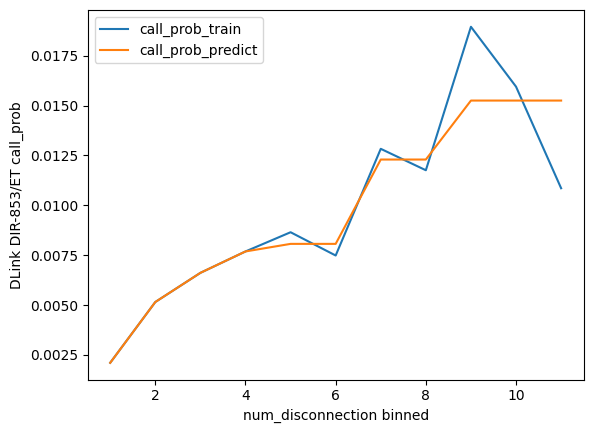

In [109]:
isoR = IsotonicRegression(
        y_min=0,
        y_max=1,
        increasing=True,
        out_of_bounds="clip")
grouped = df.groupby(['modelName'])
for model, data in grouped:
    x_train = bin_labels
    y_train = data['call_prob']
    isoR_num_disc = isoR.fit(x_train, y_train)
    train_prediction = isoR_num_disc.predict(x_train)
    df.loc[(df['modelName'] == model[0]), 'prob_isoR'] = train_prediction

model_name = 'DLink DIR-853/ET'
call_prob_predict = grouped.get_group((model_name))['prob_isoR']
call_prob = grouped.get_group((model_name))['call_prob']
plt.plot(bin_labels,call_prob,label= 'call_prob_train')
plt.plot(bin_labels,call_prob_predict,label= 'call_prob_predict')
plt.xlabel('num_disconnection binned')
plt.ylabel(model_name+' call_prob')
plt.legend()
plt.show()